In [24]:
import sys
sys.path.append('../../')
import math, copy
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use('../../deeplearning.mplstyle')

In [6]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [34]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [21]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

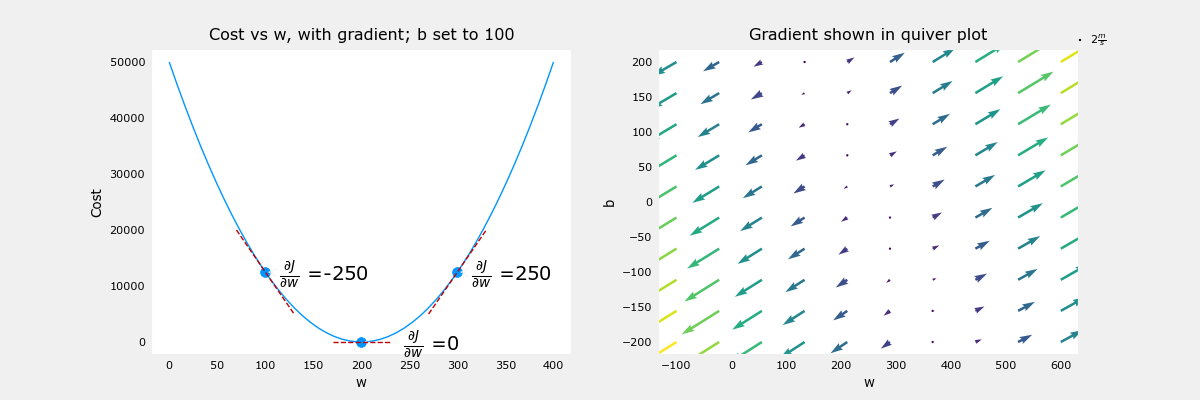

In [23]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
# plt.show()

In [44]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,w. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """

    j_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
      dj_dw, dj_db = gradient_function(x, y, w, b)

      b = b - alpha * dj_db
      w = w - alpha * dj_dw

      if i<100000:
        j_history.append( cost_function(x,y,w,b))
        p_history.append([w,b])

      if i % math.ceil(num_iters/10) ==0:
        print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
        f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
        f"w: {w: 0.3e}, b:{b: 0.5e}")
          
    return w, b, j_history, p_history

In [45]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

In [46]:
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

NameError: name 'math' is not defined